# Predicting Loans in Lending Club
The dataset was downloaded from kaggle ([link](https://www.kaggle.com/wordsforthewise/lending-club)). The data used in this project was modified a little bit in order to solve the problems of missing values.

The goal of this project is to create a model using Tensorflow 2.0 with Keras that predicts if a person is likely to return taken loan based on certain features.

#### List of the features:
* loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value
* term - The number of payments on the loan. Values are in months and can be either 36 or 60
* int_rate - Interest Rate on the loan
* installment - The monthly payment owed by the borrower if the loan originates
* grade - LC assigned loan grade
* sub_grade - LC assigned loan subgrade
* emp_title - The job title supplied by the Borrower when applying for the loan
* emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years
* home_ownership - The home ownership status provided by the borrower during registration or obtained from the credit report. Values are: RENT, OWN, MORTGAGE, OTHER
* annual_inc - The self-reported annual income provided by the borrower during registration
* verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified
* issue_d - The month which the loan was funded
* loan_status	Current status of the loan
* purpose - A category provided by the borrower for the loan request.
* title - The loan title provided by the borrower
* zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application
* addr_state - The state provided by the borrower in the loan application
* dti - A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income
* earliest_cr_line - The month the borrower's earliest reported credit line was opened
* open_acc - The number of open credit lines in the borrower's credit file
* pub_rec - Number of derogatory public records
* revol_bal - Total credit revolving balance
* revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit
* total_acc - The total number of credit lines currently in the borrower's credit file
* initial_list_status - The initial listing status of the loan. Possible values are W, F
* application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc - Number of mortgage accounts
* pub_rec_bankruptcies - Number of public record bankruptcies

## Libraries
Importing essential libraries: numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Preview of The Data
Checking the consistency of the dataset.

In [2]:
df = pd.read_csv('data\LC_Loans_Data.csv')

In [3]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [7]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There are some features with missing data. Certain steps will be taken after the exploratory data analysis.

## Exploratory Data Analysis
Checking the uniformity of the data.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

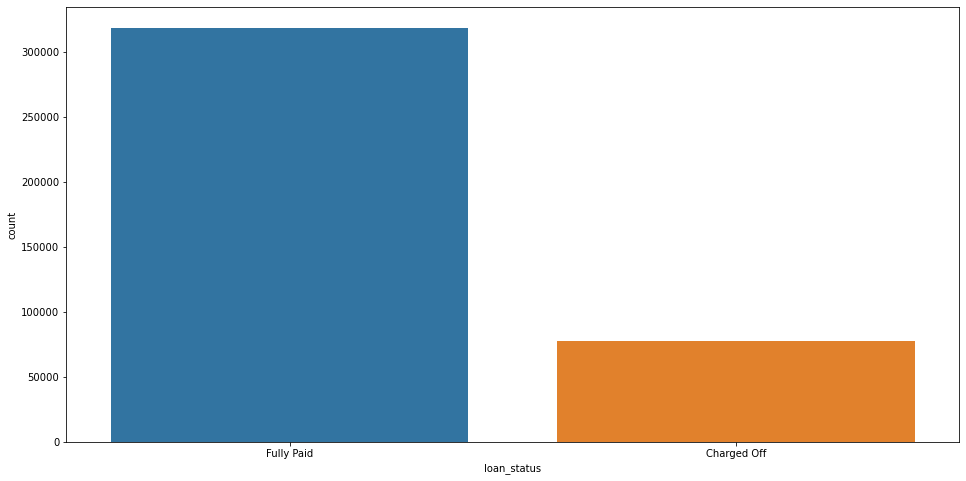

In [8]:
plt.rcParams['figure.figsize'] = [16, 8]
sns.countplot(data=df, x='loan_status')

The data is unbalanced. There are much more people who paid debts in comparison to those who did not. Let's check the correlation of the data.

(12.5, -0.5)

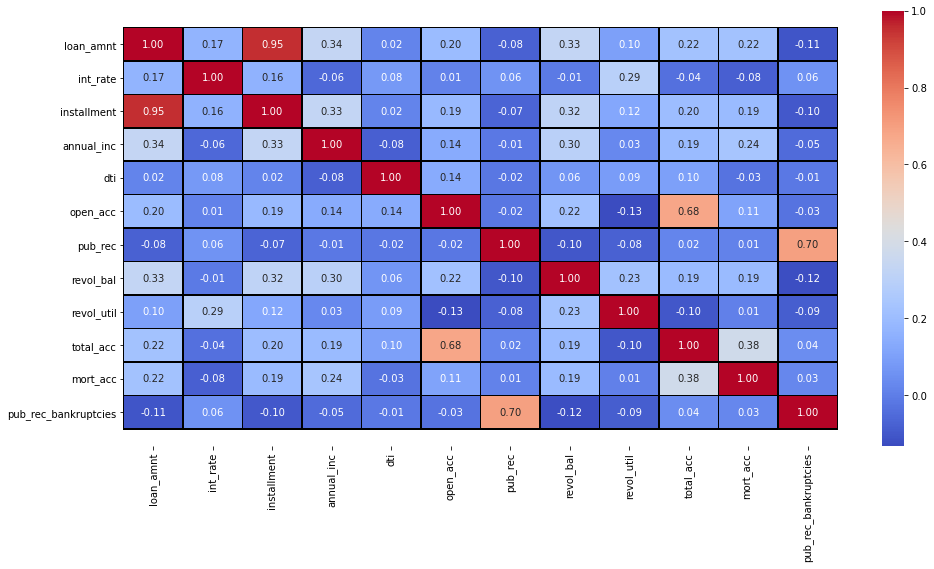

In [9]:
ax = sns.heatmap(data = df.corr(), annot = True, cmap = 'coolwarm', linewidth = 0.5, linecolor = 'black', fmt = '.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The highest correlation is between loan_amnt and installment (0.95). They are highly correlated because loan_amt is the amount of the loan applied for by the borrower whereas the installment is the montly payment owed by the borrowerer.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

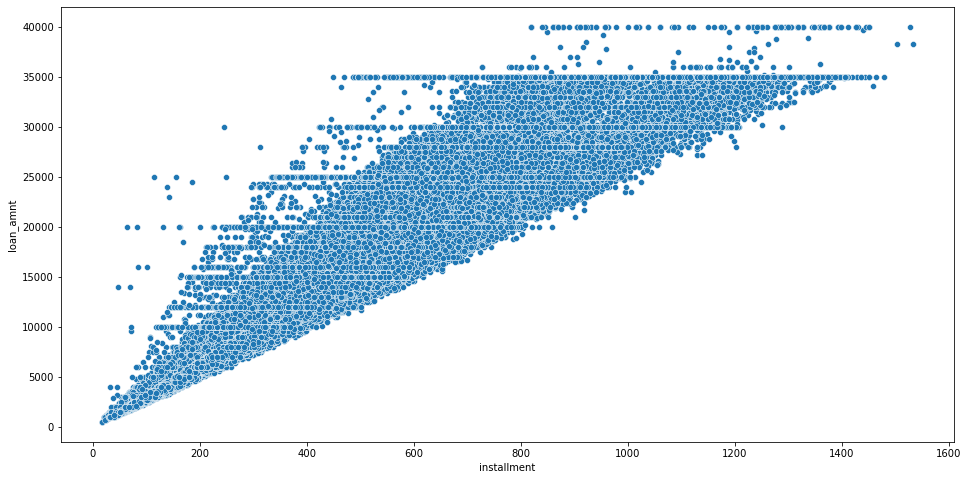

In [10]:
sns.scatterplot(data = df, x='installment', y = 'loan_amnt')

Let's check the relationship between the status of the loan and loan amount.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

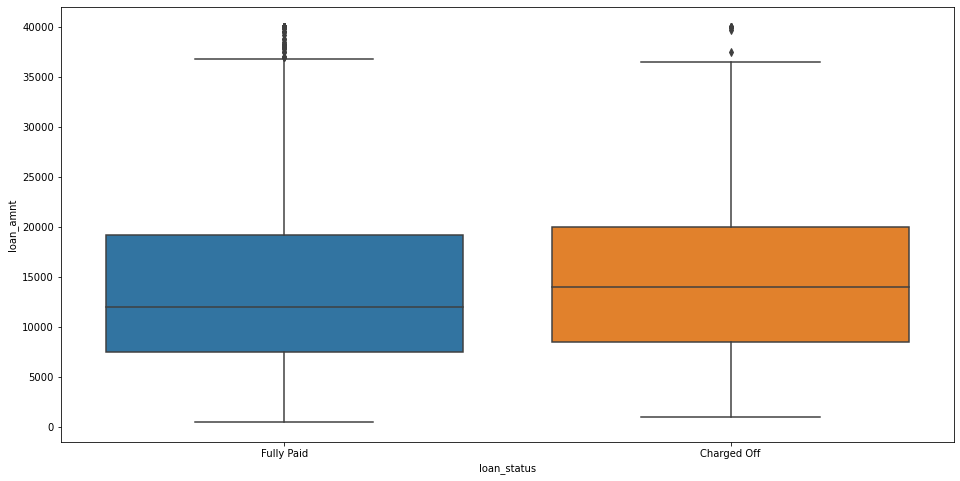

In [11]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

In [12]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


If a loan amount is higher, it is more likely that a loan is going to be charged off. It seems that smaller loans are paid more easily, but it is not a key indicator. Let's now investigate grades and sub-grades.

In [13]:
grade_order = list(df['grade'].sort_values().unique())
print(grade_order)

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [14]:
sub_grade_order = list(df['sub_grade'].sort_values().unique())
print(sub_grade_order)

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


<AxesSubplot:xlabel='grade', ylabel='count'>

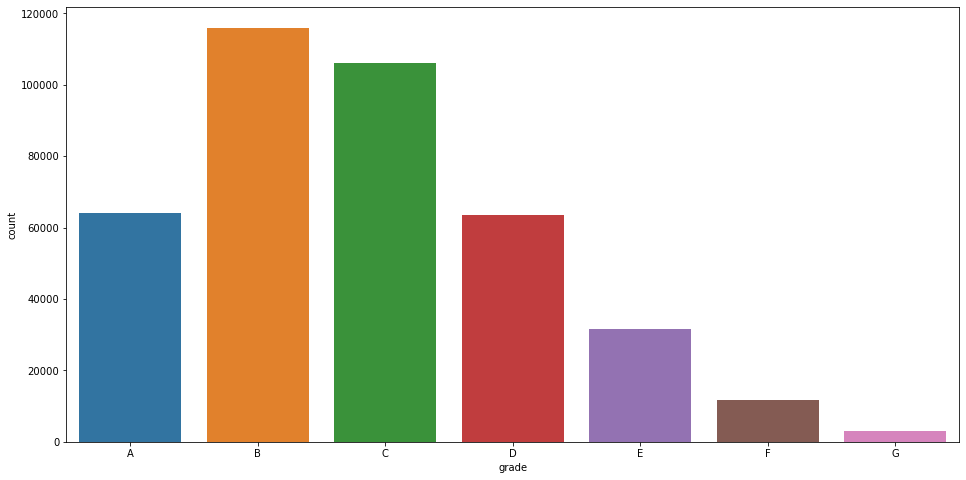

In [15]:
sns.countplot(data = df, x = 'grade', order = grade_order)

<AxesSubplot:xlabel='grade', ylabel='count'>

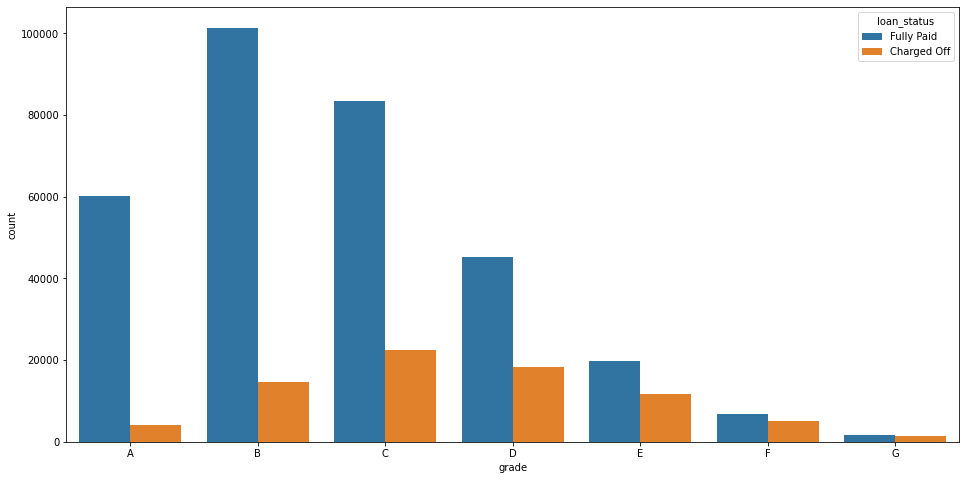

In [16]:
sns.countplot(data = df, x = 'grade', hue = 'loan_status', order = grade_order)

The grade system categorizes people for "good" and "bad" customers. The assigning system seems to work very well as we can see, almost all people getting grade A are paying their debts. As the grade goes on, people are more likely not to pay their debts. Grades E, F and G bring high risk of debts not to be paid back. Let's check which grades are usually given.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

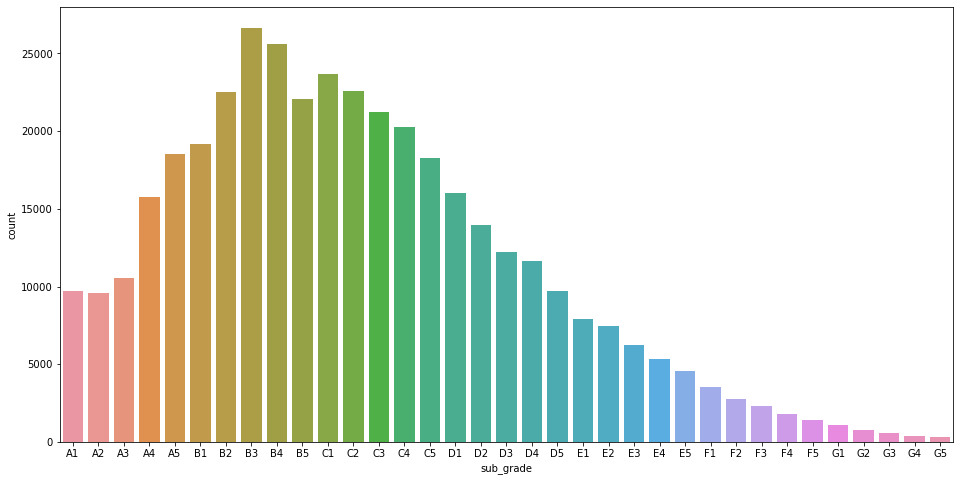

In [17]:
sns.countplot(data=df, x='sub_grade', order = sub_grade_order)

Grades from B to C are the most dominant. Let's compare it with the loan status.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

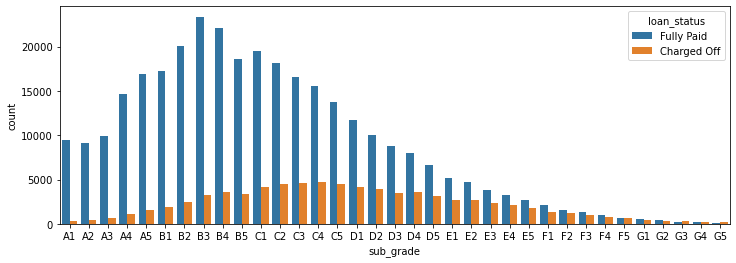

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='sub_grade', order=sub_grade_order, hue='loan_status')

The grades from F and G are not very visible, let's zoom it in.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

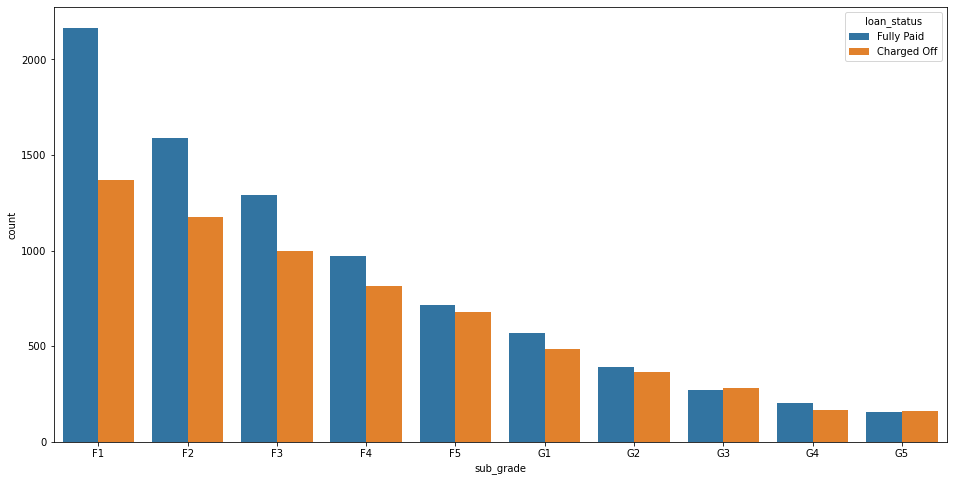

In [19]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

As mentioned before, people who were assigned grades F and G are likely not to pay back their debts.

## Data PreProcessing
The goal of this section is to remove or fill any missing/repeated data and convert categorical string features into dummy variables.

### Checking the missing data.

In [20]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There are 6 features to be looked into: emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies.

In [21]:
(df.isnull().sum() / len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Highest missing rate is for mort_acc (9.5%), emp_title (5.8%) and emp_length (4.6%). Let's focus first on the emp_title (what is a job of a loan-taker) and emp_length(how long he/she has been working).

In [22]:
df['emp_title'].value_counts()

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
staff materials engineer       1
Pharmacy resident              1
Ash Brokerage                  1
Driver, over the road          1
Fiber optics  specialist       1
Name: emp_title, Length: 173105, dtype: int64

Teachers and managers are the biggest professional groups.

In [23]:
df['emp_title'].nunique()

173105

However, there are too many unique job titles - 173105. As checked before we would need to fill 22927 job titles. It is hard to properly fill this missing data and also it would be extremely hard to convert it into a dummy variable feature, hence this column will be removed.

In [24]:
df = df.drop('emp_title', axis = 1)

In [25]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [26]:
my_order = ['< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

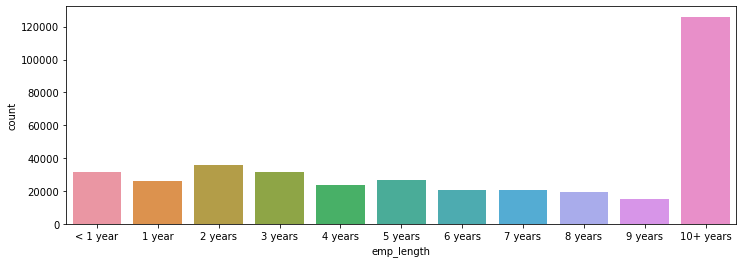

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='emp_length', order=my_order)

Loans are usually taken by people who have a stable working situation (10+ years). Let's check how it compares with loan status.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

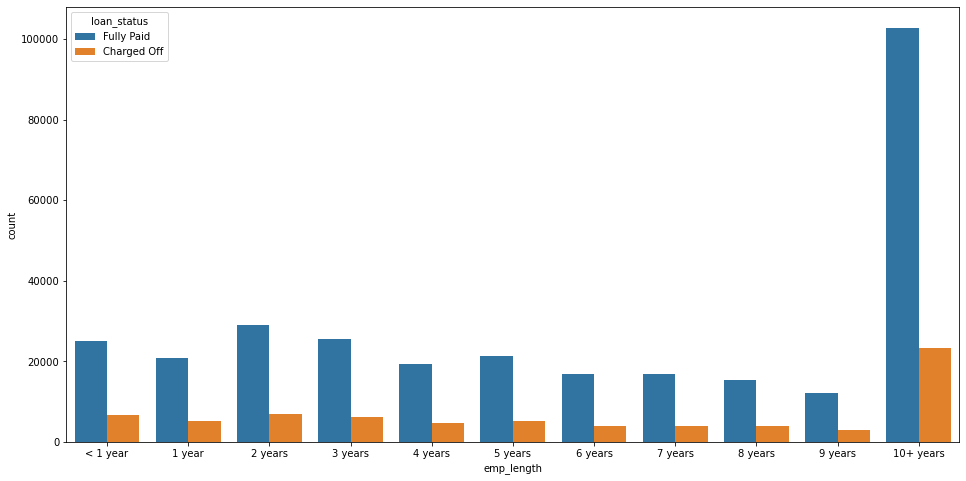

In [28]:
sns.countplot(data=df, x='emp_length', hue=df['loan_status'], order=my_order)

Let's check the perctange of each group.

In [29]:
emp_paid = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_charged = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [30]:
emp_charged/(emp_charged+emp_paid)*100

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

It can be seen that all the groups have similar 19% - 20% of people who do not pay their debts (unlike Lannisters). The differences are not high so this column will be removed aswell.

In [31]:
df = df.drop('emp_length', axis = 1)

Let's now have a look into title feature as it lacks few positions.

In [32]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

When we compare it with purpose feature, we can notice that they are equivalent.

In [33]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

Since purpose feature does not have any missing data, let's delete the title column.

In [34]:
df = df.drop('title', axis = 1)

Let's focus on the mort_acc now.

In [35]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

Let's fill the missing values based on the most correlated feature.

In [36]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

The most correlated feature is total_acc. Let's fill the missing data with average value of total_acc.

In [37]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [38]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [39]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

Let's check what we are left with.

In [40]:
(df.isnull().sum() / len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

The last two featues account only for 0.07% and 0.14% which is extremely low compared to the size of the dataset. For this reason, the rows can be deleted as it should not affect the final model much.

In [41]:
df = df.dropna()

In [42]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Dummy Variables
Let's take care of string values.

In [43]:
list(df.select_dtypes(['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

<b>term feature</b>

In [44]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [45]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [46]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

<b>grade and sub_grade feature</b>

We are already aware that sub_grade feature is based on grade feature and gives us more information. Because of that let's get rid of grade feature.

In [47]:
df = df.drop('grade',axis=1)

In [48]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [49]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [50]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

<b>home ownership</b>

In [51]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Other, none and any are much the same. Let's transform none and any to other so we end up with 4 categories.

In [52]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [53]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

<b>verification status, application_type, initial_list_status, purpose</b>

In [54]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [55]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [56]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [57]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

No additional actions are needed.

In [58]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [59]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_weddi

<b>issue_d</b>

The issue date can be deleted as it informs us when a particular loan was taken. In our model we should not know about this beforehand.

In [60]:
df = df.drop('issue_d',axis=1)

<b>earliest_cr_line</b>

In [61]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Aug-1959       1
Nov-1957       1
Nov-1950       1
May-1962       1
Nov-1955       1
Name: earliest_cr_line, Length: 684, dtype: int64

An interesting information would be a year.

In [62]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [63]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'earliest_cr_year'],
      dtype=

<b>address</b>

In [64]:
df['address'].value_counts()

USNS Johnson\r\nFPO AE 05113                                 8
USS Smith\r\nFPO AP 70466                                    8
USCGC Smith\r\nFPO AE 70466                                  8
USS Johnson\r\nFPO AE 48052                                  8
USNS Johnson\r\nFPO AP 48052                                 7
                                                            ..
5090 Bethany Corners Suite 616\r\nLake Victoria, CT 70466    1
44354 Mccormick Freeway\r\nPatrickshire, AZ 29597            1
USNV Phelps\r\nFPO AP 29597                                  1
USS Palmer\r\nFPO AA 93700                                   1
115 Lonnie Well Apt. 046\r\nLake Nathanshire, MT 22690       1
Name: address, Length: 392898, dtype: int64

A valuable information would be a zip-code. Let's take it out.

In [65]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [66]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'earliest_cr_year', '05113',
       '11650',

In [68]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

<b>loan_status</b>

We are left with last feature loan_status. Let's convert it to binary system 0,1.

In [69]:
df['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [70]:
df['loan_paid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [71]:
df[['loan_paid','loan_status']]

,loan_paid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [72]:
df = df.drop('loan_status',axis=1)

In [73]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

Let's check the final df.

In [74]:
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,loan_paid
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,1
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,1,0,0,0,0,1
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,1,0,0,0,0,0,0,0,0,1
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,1,0,0,1
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,1,0,0,0,0,0,1


## Data Preparation (Train Test Split)
Let's prepare the data for the model.

In [75]:
y = df['loan_paid'].values
X = df.drop('loan_paid', axis = 1).values

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Normalization (Scaling The Train Set)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
X_train.min()

0.0

In [81]:
X_train.max()

1.0

## Building a Model
Let's build a model with 78-39-19 neurons with 2 hidden layers. Let's use sigmoid as an optimizer.

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [83]:
model = Sequential()

model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [84]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=256)

Epoch 1/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2983 - val_loss: 0.2625
Epoch 2/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2653 - val_loss: 0.2615
Epoch 3/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2633 - val_loss: 0.2601
Epoch 4/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2625 - val_loss: 0.2597
Epoch 5/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2615 - val_loss: 0.2597
Epoch 6/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2611 - val_loss: 0.2595
Epoch 7/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2607 - val_loss: 0.2595
Epoch 8/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2603 - val_loss: 0.2588
Epoch 9/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2600 - val_loss: 0.2594
Epoch 10/50
1236/1236 [==============================] - 2s 2ms/step - loss: 0.259

In [85]:
df_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

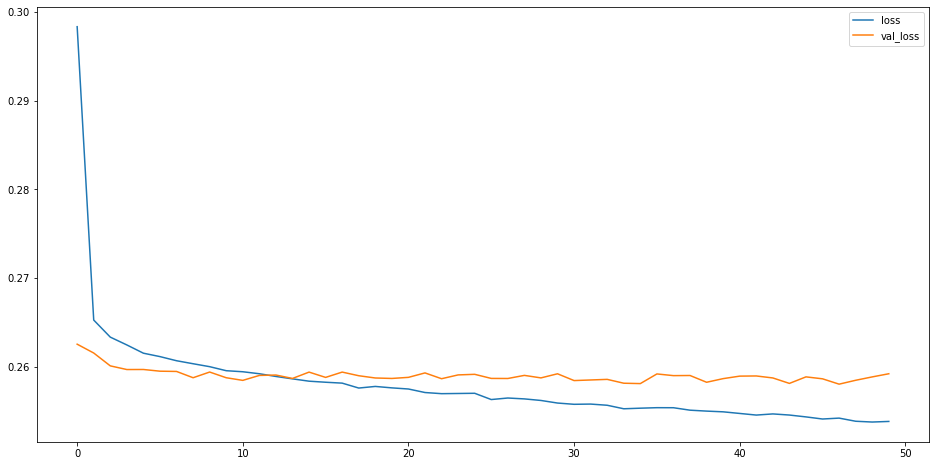

In [86]:
df_loss[['loss','val_loss']].plot()

In [87]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## Model evaluation

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

<b> Classification Report </b>

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61     15397
           1       0.88      0.99      0.93     63647

    accuracy                           0.89     79044
   macro avg       0.91      0.72      0.77     79044
weighted avg       0.89      0.89      0.87     79044



<b> Confusion Matrix </b>

In [90]:
confusion_matrix(y_test,predictions)

array([[ 7000,  8397],
       [  424, 63223]], dtype=int64)

## Predicting if a loan will be paid back
Let's pick a random loan-taker and compare a real and predicted pay back of a debt.

In [91]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

random_customer = df.iloc[random_ind]
real_paid = random_customer['loan_paid']

random_customer = random_customer.drop('loan_paid')
random_customer = random_customer.values.reshape(1, 78)
predicted_paid = model.predict_classes(random_customer)

In [92]:
real_value = df.iloc[random_ind]['loan_paid']
predicted_value = float([[x2 for x2 in x1] for x1 in predicted_paid].pop(0).pop(0))

In [93]:
if real_value==predicted_value:
    print('Success! The model correctly predicted the loan. Anticipated status of the loan matches with real status of the loan.')
else:
    print('Fail! The model did not predict correctly the loan. Anticipated status of the loan does not match with real status of the loan')

Success! The model correctly predicted the loan. Anticipated status of the loan matches with real status of the loan.
